In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('dataset.csv')
vehicles = list(set(dataset['READING_ID']))
len(vehicles)

20000

In [3]:
#Vehicle Load
def get_GCW (vehicle):
    i = 2
    GCW_constant = 0
    for GCW in dataset[dataset['READING_ID'] == vehicle]['PARAM_VALUE'][2:31]:
        GCW_constant += int(GCW)
    GCW_power = 0
    for GCW in dataset[dataset['READING_ID'] == vehicle]['PARAM_VALUE'][2:31]:
        GCW_power += i*int(GCW)
        i += 1
    return GCW_power/GCW_constant

def get_GCW_full (vehicle):
    return list(dataset[dataset['READING_ID'] == vehicle]['PARAM_VALUE'][2:31])

In [4]:
#Drive Speed
def get_DS (vehicle):
    return list(dataset[dataset['READING_ID'] == vehicle]['PARAM_VALUE'])[0]

def get_SPEED_full (vehicle):
    return list(dataset[dataset['READING_ID'] == vehicle]['PARAM_VALUE'][34:55])

In [5]:
#Slopes
def get_S1 (vehicle):
    return list(dataset[dataset['READING_ID'] == vehicle]['PARAM_VALUE'])[31]
def get_S2 (vehicle):
    return list(dataset[dataset['READING_ID'] == vehicle]['PARAM_VALUE'])[32]
def get_S3 (vehicle):
    return list(dataset[dataset['READING_ID'] == vehicle]['PARAM_VALUE'])[33]

In [6]:
#Fuel Efficiency (Target Variables)
def get_FE (vehicle):
    return list(dataset[dataset['READING_ID'] == vehicle]['PARAM_VALUE'])[1]

In [7]:
inference_dataset = pd.DataFrame(columns = ['FE', 'GCW', 'DS', 'S1', 'S2', 'S3'], index = [vehicles])
for vehicle in vehicles:
    print('-', end = '')
    inference_dataset.loc[vehicle, 'FE']  = get_FE(vehicle)
    inference_dataset.loc[vehicle, 'GCW'] = get_GCW(vehicle)
    inference_dataset.loc[vehicle, 'DS']  = get_DS(vehicle)
    inference_dataset.loc[vehicle, 'S1']  = get_S1(vehicle)
    inference_dataset.loc[vehicle, 'S2']  = get_S2(vehicle)
    inference_dataset.loc[vehicle, 'S3']  = get_S3(vehicle)

In [50]:
inference_dataset

,FE,GCW,DS,S1,S2,S3
0,3.76,13.936842,7.4,7.66,3.81,0.37
1129447429,3.16,18.666667,5.49,8.0,3.3,0.29
599392263,3.6,14.442105,5.8,6.48,5.53,0.83
1132986378,1.54,16.870968,0.86,0.99,3.54,5.96
1089339403,3.86,14.98913,6.83,7.69,3.73,0.43
...,...,...,...,...,...,...
1133248488,3.23,18.234043,6.43,7.73,3.6,0.48
1134952432,3.03,20.877778,6.2,9.04,1.61,0.1
1089339381,1.52,15.968085,0.98,4.6,3.23,3.79
835846135,3.32,18.419355,6.58,7.48,4.07,0.45


In [339]:
inference_dataset.to_csv('dataset.csv')

In [58]:
x = inference_dataset[['GCW','DS','S1','S2','S3']][0:16000]
y = inference_dataset['FE'][0:16000]
clf = LinearRegression()
clf.fit(x,y)
clf.coef_ 

array([-0.17341003,  0.23337345,  0.13593042, -0.006251  , -0.10599713])

In [59]:
y_pred = clf.predict(inference_dataset[['GCW','DS','S1','S2','S3']][16000:20001])
y_pred

array([2.63721773, 1.39289358, 3.62442535, ..., 1.63119345, 3.25326916,
       3.28046947])

In [56]:
i = 0
error_list = []
for pred in y_pred:
    if list(inference_dataset['FE'])[16000 + i] != 0:
        error_list.append(abs((pred - list(inference_dataset['FE'])[16000 + i]))/(list(inference_dataset['FE'])[16000 + i]))
        i += 1
pred_errors = np.array(error_list)
print('RMSE Test:',np.mean(pred_errors))
print('SD Test:',np.std(pred_errors))

RMSE Test: 0.08679785440575702
SD Test: 0.0889578219170396


In [60]:
i = 0
error = 0
for pred in y_pred:
    if list(inference_dataset['FE'])[16000 + i] != 0:
        error += abs(pred - list(inference_dataset['FE'])[16000 + i])/(list(inference_dataset['FE'])[16000 + i])
        i += 1
print('RMSE Test:',error/i)

RMSE Test: 0.08679785440575696


In [57]:
y_pred = clf.predict(inference_dataset[['GCW','DS','S1','S2','S3']][0:16000])
i = 0
error_list = []
for pred in y_pred:
    if list(inference_dataset['FE'])[i] != 0:
        error_list.append(abs((pred - list(inference_dataset['FE'])[i]))/(list(inference_dataset['FE'])[i]))
        i += 1
pred_errors = np.array(error_list)
print('RMSE Train:',np.mean(pred_errors))
print('SD Train:',np.std(pred_errors))

RMSE Train: 0.09263040160535226
SD Train: 0.39198064747912564


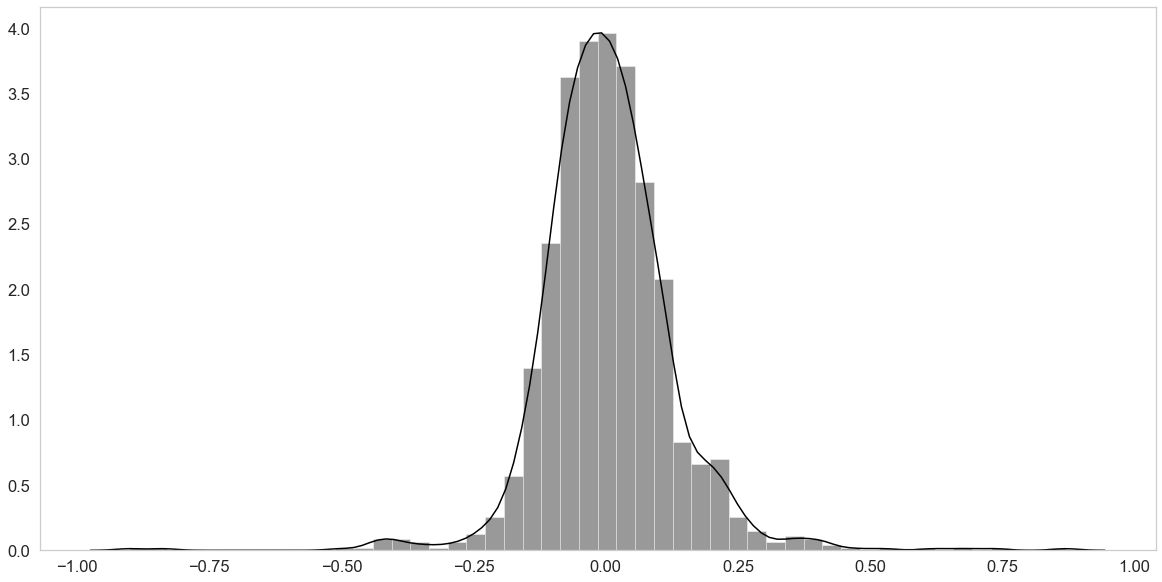

In [389]:
i = 0
error_list = []
for pred in y_pred:
    if list(inference_dataset['FE'])[16000 + i] != 0:
        error_list.append((pred - list(inference_dataset['FE'])[16000 + i])/(list(inference_dataset['FE'])[16000 + i]))
        i += 1
plt.figure(figsize = [20,10])
sns.set(font_scale = 1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.distplot(error_list, color = 'black')

In [299]:
GCW_cols = []
for i in range(1,30):
    GCW_cols.append('GCW' + str(i))
SPEED_cols = []
for i in range(1,21):
    SPEED_cols.append('SPEED' + str(i))

In [286]:
inference_dataset_full = pd.DataFrame(columns = ['FE', 'DS', 'S1', 'S2', 'S3'] + GCW_cols + SPEED_cols, index = [vehicles])
for vehicle in vehicles:
    inference_dataset_full.loc[vehicle, 'FE'] = get_FE(vehicle)
    GCW_full = get_GCW_full(vehicle)
    for i in range(1,30):
        inference_dataset_full.loc[vehicle, 'GCW' + str(i)] = GCW_full[i - 1]
    SPEED_full = get_SPEED_full(vehicle)
    for i in range(1,21):
        try:
            inference_dataset_full.loc[vehicle, 'SPEED' + str(i)] = SPEED_full[i - 1]
        except:
            inference_dataset_full.loc[vehicle, 'SPEED' + str(i)] = 'NA'
            print(vehicle)
    inference_dataset_full.loc[vehicle, 'S1'] = get_S1(vehicle)
    inference_dataset_full.loc[vehicle, 'S2'] = get_S2(vehicle)
    inference_dataset_full.loc[vehicle, 'S3'] = get_S3(vehicle)

382737284
65683455
1136560058
1054252136
229429608
268098820
263381158
730919396
914173658
1133206415
139812656
188442019
270626461
898331824
51478278
1131381225
470255168
226737411
513654929
397398499
73266901
259915194


In [300]:
inference_dataset_full

,FE,DS,S1,S2,S3,GCW1,GCW2,GCW3,GCW4,GCW5,...,SPEED11,SPEED12,SPEED13,SPEED14,SPEED15,SPEED16,SPEED17,SPEED18,SPEED19,SPEED20
0,3.76,NaN,7.66,3.81,0.37,0.0,0.0,1.32,0.0,0.0,...,6.57,5.84,9.85,10.58,20.44,2.92,1.09,0.73,0.36,0.0
1129447429,3.16,NaN,8.0,3.3,0.29,0.0,0.0,0.59,0.0,0.0,...,10.89,10.62,10.82,0.9,0.06,0.02,0.0,0.0,0.0,0.0
599392263,3.6,NaN,6.48,5.53,0.83,0.0,0.0,0.65,0.0,0.0,...,14.94,15.76,11.12,0.36,0.0,0.0,0.0,0.0,0.0,0.0
1132986378,1.54,NaN,0.99,3.54,5.96,0.0,0.0,0.0,0.0,0.4,...,0.24,0.05,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1089339403,3.86,NaN,7.69,3.73,0.43,0.0,0.0,1.02,0.0,0.0,...,10.51,11.68,18.7,11.63,3.28,0.42,0.04,0.01,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133248488,3.23,NaN,7.73,3.6,0.48,0.0,0.0,0.06,0.0,0.0,...,7.63,6.76,9.45,7.35,5.48,3.35,1.75,0.89,1.0,0.26
1134952432,3.03,NaN,9.04,1.61,0.1,0.0,0.0,0.46,0.0,0.0,...,23.05,17.88,3.09,0.16,0.07,0.0,0.0,0.0,0.0,0.0
1089339381,1.52,NaN,4.6,3.23,3.79,0.0,0.0,0.0,0.0,0.0,...,0.03,0.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
835846135,3.32,NaN,7.48,4.07,0.45,0.0,0.0,0.3,0.0,0.0,...,8.59,7.98,10.51,7.0,4.38,2.39,1.04,0.44,0.27,0.0


In [303]:
inference_dataset_full.to_csv('dataset_full.csv')

In [304]:
dataset

,READING_ID,PARAMETER,IDX,PARAM_VALUE
0,0,DRIVE_SPEED,0,7.40
1,0,FUEL_EFF,0,3.76
2,0,GCW,1,0.00
3,0,GCW,2,0.00
4,0,GCW,3,1.32
...,...,...,...,...
1079973,1136807896,SPEED,16,1.49
1079974,1136807896,SPEED,17,1.18
1079975,1136807896,SPEED,18,0.69
1079976,1136807896,SPEED,19,0.56


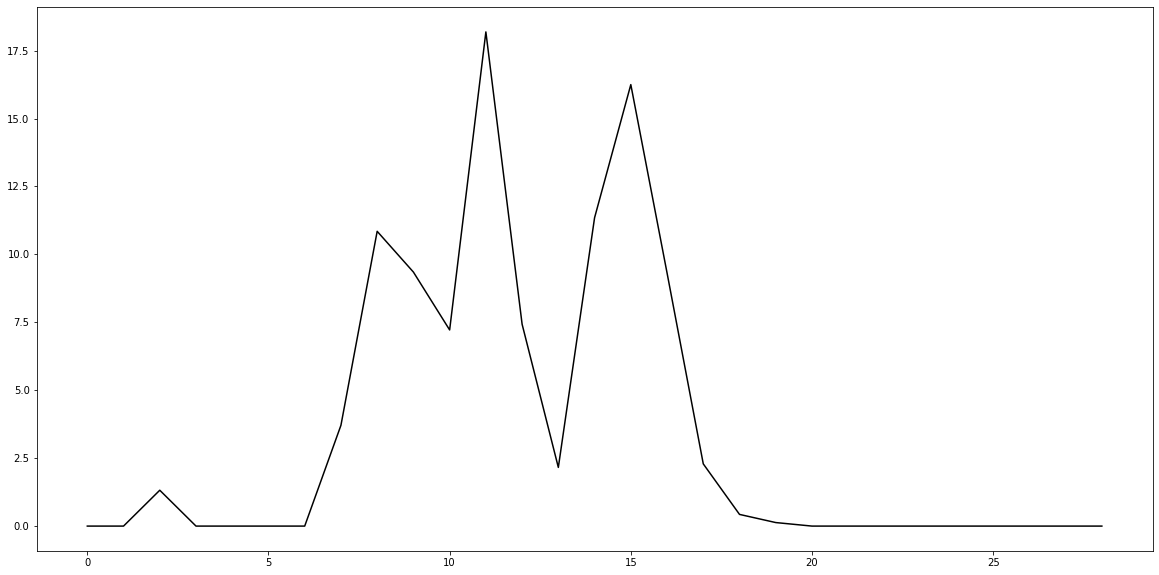

In [327]:
plt.figure(figsize = [20,10])
plt.plot(list(get_GCW_full(vehicles[0])), color = 'black')

In [330]:
get_GCW(vehicles[0])

13.936842105263159

Text(0.5, 0, 'S3')

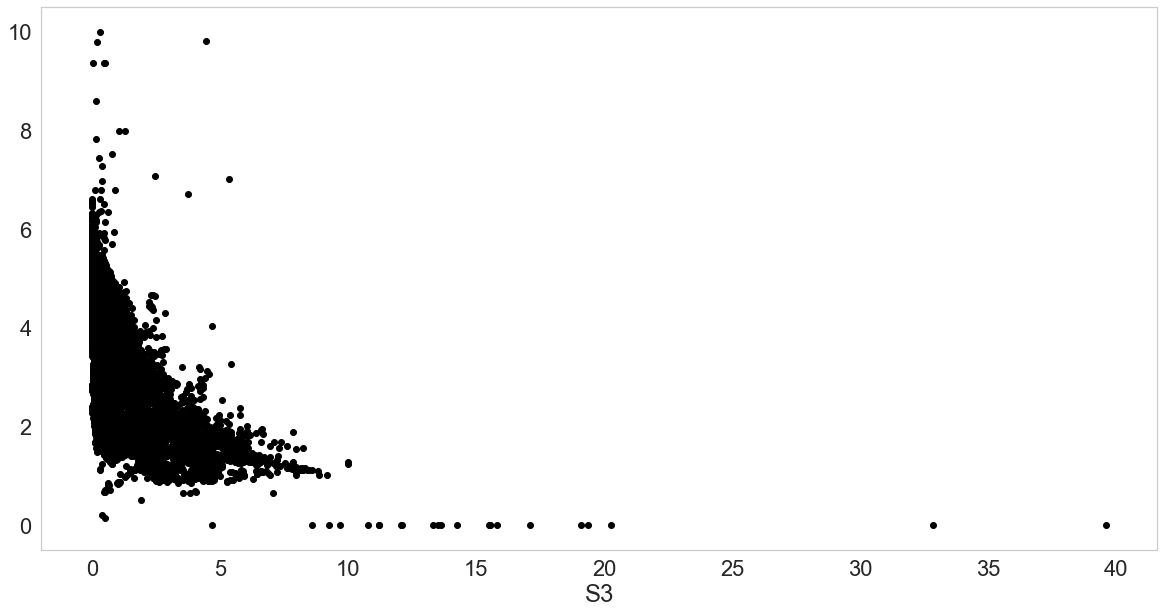

In [47]:
plt.figure(figsize = [20,10])
plt.scatter(inference_dataset['S3'], inference_dataset['FE'], color = 'black')
plt.xlabel('S3')

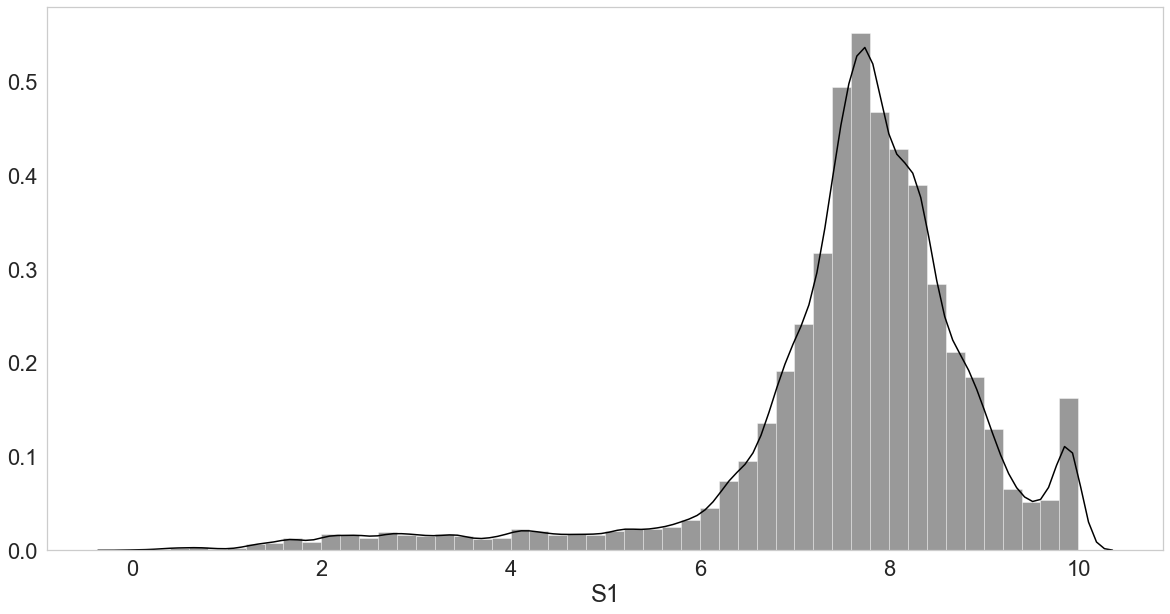

In [40]:
plt.figure(figsize = [20,10])
sns.set(font_scale = 2)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.distplot(inference_dataset['S1'], color = 'black')